In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from scipy import signal

np.random.seed(0)
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
plt.rcParams['text.usetex'] = True
from matplotlib import colors

import matplotlib.patches as mpatches

In [2]:
def obj_fn_R(x):
    return 20 + (x[0]**2 - 10*np.cos(2*np.pi*x[0])) + (x[1]**2 - 10*np.cos(2*np.pi*x[1]))

def obj_fn_H(x):
    return ((x[0]+3.0)**2 + (x[1]+2) - 11)**2 + ((x[0]+3) + (x[1]+2)**2 - 7)**2

def grad_fn_R(x):
    g = 0 * x
    g[0] = 2.0*x[0] + 10.0*2*np.pi*np.sin(2*np.pi*x[0])
    g[1] = 2.0*x[1] + 10.0*2*np.pi*np.sin(2*np.pi*x[1])
    return g

def grad_fn_H(x):
    g = 0 * x
    g[0] = 4*(x[0]+3)*((x[0]+3)**2+(x[1]+2)-11) + 2*((x[0]+3)+(x[1]+2)**2-7)
    g[1] = 2*((x[0]+3)**2+(x[1]+2)-11) + 4*(x[1]+2)*((x[0]+3)+(x[1]+2)**2-7)
    return g

def obj_fn_two(x):
    return obj_fn_R(x) + obj_fn_H(x)

def grad_fn_two(x):
    rand_ind = np.random.randint(2)
    if rand_ind == 0:
        grad = obj_fn_R(x)
    else:
        grad = obj_fn_H(x)
    return grad

In [3]:
def gradient_descent(obj_fn, grad_fn, x0, alpha, iter_num):
    x1 = 0.0 * x0
    x_trace = np.zeros([iter_num,2])
    for i in range(iter_num):
        # print(obj_fn(x0))
        grad = grad_fn(x0)
        x1 = x0 - alpha * grad
        x0 = x1
        x_trace[i] = x0
    return x0, x_trace


def SGD(grad_fn1, grad_fn2, x0, alpha, iter_num):
    x1 = 0.0 * x0
    x_trace = np.zeros([iter_num,2])
    for i in range(iter_num):
        if np.random.randint(2) == 0:
            grad = grad_fn1(x0)
        else:
            grad = grad_fn2(x0)
        x1 = x0 - alpha * grad
        x0 = x1
        x_trace[i] = x0
    return x0, x_trace
    

def ML_SGD(grad_fn1, grad_fn2, x0, alpha, iter_num, nu, Nr):
    x1 = 0.0 * x0
    x_trace = np.zeros([iter_num,2])
    
    grad_rand_index = np.random.randint(2, size=Nr)
    # print(grad_rand_index)
    
    for i in range(iter_num):
        # print(obj_fn(x0))
        
        x_sample = multivariate_normal.rvs(x0, 1/nu, size=Nr)
        grad_sample = 0.0 * x_sample
        
        for j in range(Nr):
            if grad_rand_index[j] == 0:
                grad_sample[j] = grad_fn1(x_sample[j])
            else:
                grad_sample[j] = grad_fn2(x_sample[j])
            
        grad = sum(grad_sample) / Nr
        x1 = x0 - alpha * grad
        x0 = x1
        
        x_trace[i] = x0
    return x0, x_trace

## Draw Graph

In [4]:
x0 = np.array([-1.2,1])
nu = 20
Nr = 100
grad = grad_fn_R(x0) + grad_fn_H(x0)

np.random.seed(0)
x_sample = multivariate_normal.rvs(x0, 1/nu, size=Nr)
grad_sample = np.zeros(2)
        
for j in range(Nr):
    grad_sample += grad_fn_R(x_sample[j]) + grad_fn_H(x_sample[j])

grad_sample = grad_sample / Nr

grad_sample = grad_sample / (grad_sample[0]**2 + grad_sample[1]**2)**(1/2)
grad = grad / (grad[0]**2 + grad[1]**2)**(1/2)

rr = 1
grad = grad / rr
grad_sample = grad_sample / rr
print(grad)
print(grad_sample)

[-0.91910538  0.39401179]
[-0.70675467  0.70745872]


In [10]:
# fig, ax = plt.subplots(nrows=1, figsize=(5,4))

# legend_elements = [Line2D([0], [0], marker='o', color='r', label=r'$x_0$',
#                          markerfacecolor='r', markersize=5, lw=0, alpha=1),
#     Line2D([0], [0], marker='o', color='b', label=r'Random samples near $x_0$',
#                          markerfacecolor='b', markersize=5, lw=0, alpha=0.5)]

# ax.contour(x,y,val,cmap="gray",levels=100, alpha=0.3)
# arrow1 = mpatches.FancyArrowPatch((x0[0], x0[1]), (x0[0]-grad[0], x0[1]-grad[1]),
#                                  mutation_scale=10, alpha=1, color='r')
# ax.add_patch(arrow1)
# arrow2 = mpatches.FancyArrowPatch((x0[0], x0[1]), (x0[0]-grad_sample[0], x0[1]-grad_sample[1]),
#                                  mutation_scale=10, alpha=1, color='b')
# ax.add_patch(arrow2)
# ax.scatter(x0[0],x0[1],color="r")
# ax.scatter(x_sample[:,0],x_sample[:,1],color="b", alpha=0.1)
# ax.legend(handles=legend_elements, loc=1)
# fig.tight_layout()

# plt.savefig('/Users/lida/Desktop/ML_opt/paper/images/grad_demo.pdf')

Text(0.5, 1.0, 'objective function')

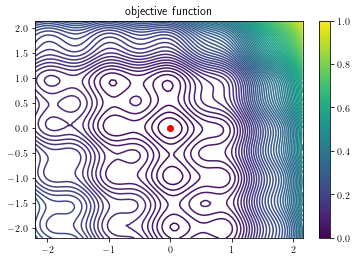

In [11]:
x, y = np.mgrid[-2.2:2.2:.05, -2.2:2.2:.05]
pos = np.dstack((x, y))
val1 = np.zeros([pos.shape[0],pos.shape[1]])
val2 = np.zeros([pos.shape[0],pos.shape[1]])

for i in range(pos.shape[0]):
    for j in range(pos.shape[1]):
        val1[i,j] = obj_fn_R([pos[i,j,0], pos[i,j,1]])
        val2[i,j] = obj_fn_H([pos[i,j,0], pos[i,j,1]])
        
val = val1 + val2
plt.contour(x,y,val,cmap="viridis",levels=100)
plt.scatter([0],[0],color="r")
plt.colorbar()
plt.title("objective function")

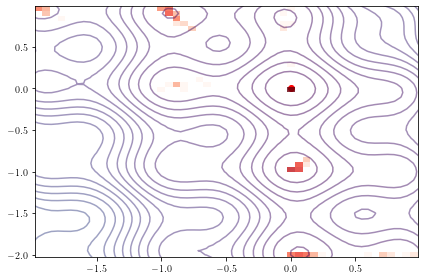

In [12]:
xx = np.load('toy_prob_2_SGD.npy')
plt.figure(figsize=(6,4))

plt.contour(x,y,val,cmap="viridis",levels=100, alpha=0.5)
plt.scatter([0],[0],color="r")
# plt.scatter(xx[:,0], xx[:,1],color="b",alpha=0.8)
plt.hist2d(xx[:,0], xx[:,1],cmap="Reds",alpha=0.8, bins=50, norm=colors.LogNorm())

plt.tight_layout()



In [13]:
file_name = ['toy_prob_2_SGD.npy',
             'toy_prob_2_MLSGD_nu50.npy',
             'toy_prob_2_MLSGD_nu5.npy',
             'toy_prob_2_MLSGD_nu5_50.npy']
title_name = ['(a) SGD Result', 
              r'(b) ML-SGD Result, $\nu_2=50$',
              r'(c) ML-SGD Result, $\nu_1=5$',
              r'(d) ML-SGD Result, $\nu_1=5$, $\nu_2=50$']

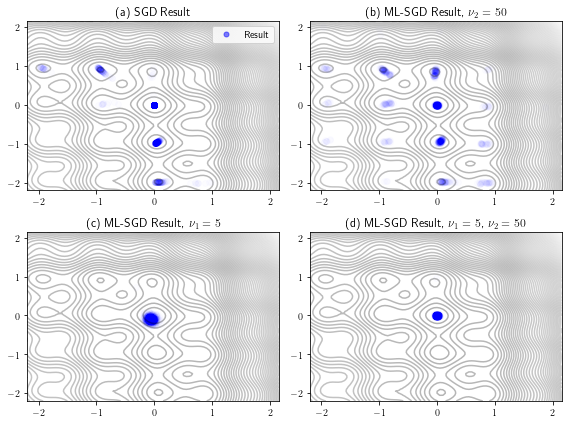

In [15]:
fig, axs = plt.subplots(2, 2, figsize=[8,6])
axs = axs.flatten()

legend_elements = [Line2D([0], [0], marker='o', color='b', label='Result',
                         markerfacecolor='b', markersize=5, lw=0, alpha=0.5)]

for i in range(4):
    xx = np.load(file_name[i])
    axs[i].contour(x,y,val,cmap="gray",levels=100, alpha=0.3)
    # axs[i].scatter([0],[0],color="r")
    axs[i].scatter(xx[:,0], xx[:,1],color="b",alpha=0.01)
    axs[i].set_title(title_name[i])
    if i == 0:
        axs[i].legend(handles=legend_elements, loc=1)
    
fig.tight_layout()

plt.savefig('toy_prob_2.jpeg')
# plt.savefig('/Users/lida/Desktop/ML_opt/paper/images/toy_prob_2.pdf')
# plt.savefig('/Users/lida/Desktop/ML_opt/paper/images/toy_prob_2.png', dpi=300)

NameError: name 'file_name' is not defined

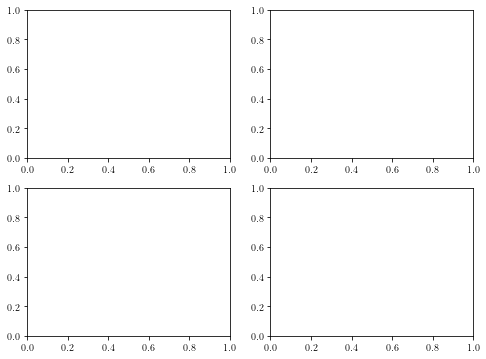

In [6]:
fig, axs = plt.subplots(2, 2, figsize=[8,6])
axs = axs.flatten()

legend_elements = [Line2D([0], [0], marker='o', color='b', label='Result',
                         markerfacecolor='b', markersize=5, lw=0, alpha=0.5)]

for i in range(4):
    xx = np.load(file_name[i])
    axs[i].contour(x,y,val,cmap="gray",levels=100, alpha=0.3)
    axs[i].scatter([0],[0],color="r")
    # axs[i].scatter(xx[:,0], xx[:,1],color="b",alpha=0.1)
    axs[i].hist2d(xx[:,0], xx[:,1],cmap="Reds",alpha=0.8, bins=100, norm=colors.LogNorm())
    axs[i].set_title(title_name[i])
    axs[i].set_xlim([-2.2,2.2])
    axs[i].set_ylim([-2.2,2.2])
    if i == 0:
        axs[i].legend(handles=legend_elements, loc=1)
    
fig.tight_layout()

# plt.savefig('/Users/lida/Desktop/ML_opt/paper/images/toy_prob_2.pdf')
# plt.savefig('/Users/lida/Desktop/ML_opt/paper/images/toy_prob_2.png', dpi=300)

## Stochastic Gradient Descent

In [7]:
x0 = np.array([1.9,1.9])
alpha = 1e-3
iter_num = 100

xx, x_trace = SGD(grad_fn_R, grad_fn_H, x0, alpha, iter_num)

plt.pcolor(x,y,val,cmap="viridis")
plt.colorbar()
plt.scatter(x_trace[:,0], x_trace[:,1],color="r",alpha=0.5)

NameError: name 'x' is not defined

In [8]:
np.random.seed(0)
N_ex = 1000
alpha = 1e-3
iter_num = 1000

x0_set = np.zeros([N_ex,2])
x0_set[:,0] = np.random.uniform(low=-2, high=2, size=N_ex)
x0_set[:,1] = np.random.uniform(low=-2, high=2, size=N_ex)
xx_set = np.zeros([N_ex,2])


for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = SGD(grad_fn_R, grad_fn_H, x0, alpha, iter_num)
    xx_set[i] = xx

plt.figure(figsize=(6,4))

plt.contour(x,y,val,cmap="viridis",levels=100,alpha=0.5)
plt.scatter([0],[0],color="r")
plt.scatter(xx_set[:,0], xx_set[:,1],color="b",alpha=0.8)

plt.tight_layout()

# np.save('toy_prob_2_SGD.npy', xx_set)

NameError: name 'x' is not defined

<Figure size 432x288 with 0 Axes>

## ML-SGD

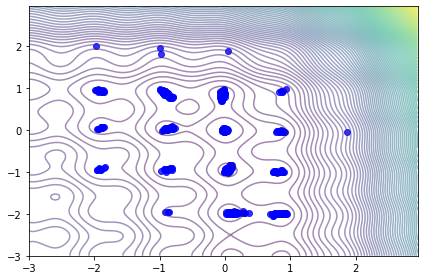

In [193]:
np.random.seed(0)

N_ex = 1000
alpha = 1e-3
iter_num = 1000
nu = 50
Nr = 10

x0_set = np.zeros([N_ex,2])
x0_set[:,0] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
x0_set[:,1] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
xx_set = np.zeros([N_ex,2])

for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_SGD(grad_fn_R, grad_fn_H, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx

plt.figure(figsize=(6,4))

plt.contour(x,y,val,cmap="viridis",levels=100,alpha=0.5)
plt.scatter([0],[0],color="r")
plt.scatter(xx_set[:,0], xx_set[:,1],color="b",alpha=0.8)

plt.tight_layout()

np.save('toy_prob_2_MLSGD_nu50.npy', xx_set)

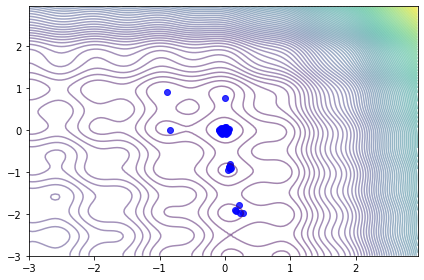

In [190]:
np.random.seed(0)

N_ex = 100
alpha = 1e-3
iter_num = 1000
nu = 10
Nr = 10

x0_set = np.zeros([N_ex,2])
x0_set[:,0] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
x0_set[:,1] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
xx_set = np.zeros([N_ex,2])

for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_SGD(grad_fn_R, grad_fn_H, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx

plt.figure(figsize=(6,4))

plt.contour(x,y,val,cmap="viridis",levels=100,alpha=0.5)
plt.scatter([0],[0],color="r")
plt.scatter(xx_set[:,0], xx_set[:,1],color="b",alpha=0.8)

plt.tight_layout()

np.save('toy_prob_2_MLSGD_nu10.npy', xx_set)

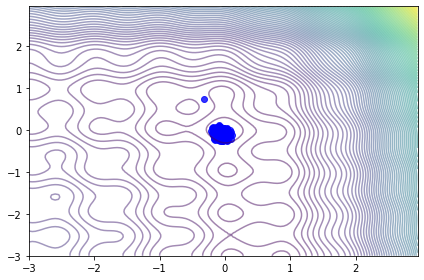

In [194]:
np.random.seed(0)

N_ex = 1000
alpha = 1e-3
iter_num = 1000
nu = 5
Nr = 10

x0_set = np.zeros([N_ex,2])
x0_set[:,0] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
x0_set[:,1] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
xx_set = np.zeros([N_ex,2])

for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_SGD(grad_fn_R, grad_fn_H, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx

plt.figure(figsize=(6,4))

plt.contour(x,y,val,cmap="viridis",levels=100,alpha=0.5)
plt.scatter([0],[0],color="r")
plt.scatter(xx_set[:,0], xx_set[:,1],color="b",alpha=0.8)

plt.tight_layout()

np.save('toy_prob_2_MLSGD_nu5.npy', xx_set)

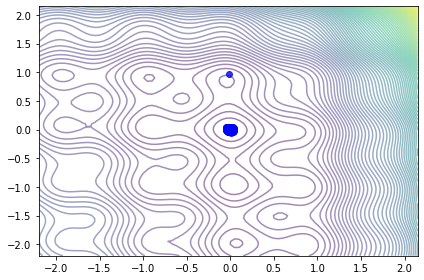

In [213]:
np.random.seed(0)

N_ex = 1000
alpha = 1e-3
iter_num = 1000

Nr = 10

x0_set = np.zeros([N_ex,2])
x0_set[:,0] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
x0_set[:,1] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
xx_set = np.zeros([N_ex,2])
xxx_set = np.zeros([N_ex,2])

nu = 5
for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_SGD(grad_fn_R, grad_fn_H, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx

nu = 50
for i in range(N_ex):
    x0 = xx_set[i]
    xx, x_trace = ML_SGD(grad_fn_R, grad_fn_H, x0, alpha, iter_num, nu, Nr)
    xxx_set[i] = xx
    
plt.figure(figsize=(6,4))

plt.contour(x,y,val,cmap="viridis",levels=100,alpha=0.5)
plt.scatter([0],[0],color="r")
plt.scatter(xxx_set[:,0], xxx_set[:,1],color="b",alpha=0.8)

plt.tight_layout()

np.save('toy_prob_2_MLSGD_nu5_50.npy', xxx_set)

In [215]:
np.save('toy_prob_2_MLSGD_nu5_50.npy', xxx_set)

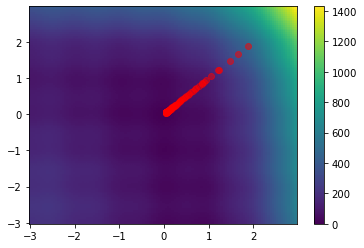

In [116]:
x0 = np.array([1.9,1.9])
alpha = 1e-3
iter_num = 100
nu = 10000
Nr = 2

xx, x_trace = ML_GD(obj_fn_two, grad_fn_two, x0, alpha, iter_num, nu, Nr)

plt.pcolor(x,y,val,cmap="viridis")
plt.colorbar()
plt.scatter(x_trace[:,0], x_trace[:,1],color="r",alpha=0.5)

[0 0 0 1 0 0 1 0 0 1]


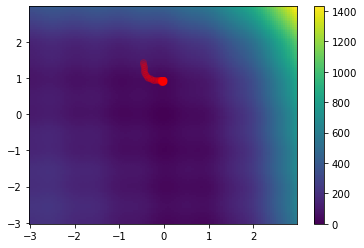

In [114]:
# x0 = np.array([1.9,1.9])
x0 = np.array([-0.46623392, 1.48004859])
alpha = 1e-3
iter_num = 100
nu = 100
Nr = 10

xx, x_trace = ML_SGD(grad_fn_R, grad_fn_H, x0, alpha, iter_num, nu, Nr)

plt.pcolor(x,y,val,cmap="viridis")
plt.colorbar()
plt.scatter(x_trace[:,0], x_trace[:,1],color="r",alpha=0.2)
# plt.title("result: ", xx)

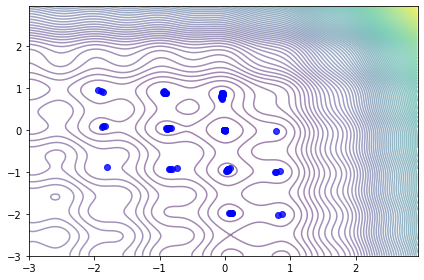

In [161]:
np.random.seed(0)

N_ex = 100
alpha = 1e-3
iter_num = 200
nu = 100
Nr = 50

x0_set = np.zeros([N_ex,2])
x0_set[:,0] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
x0_set[:,1] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
xx_set = np.zeros([N_ex,2])

for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_SGD(grad_fn_R, grad_fn_H, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx

plt.figure(figsize=(6,4))

plt.contour(x,y,val,cmap="viridis",levels=100,alpha=0.5)
plt.scatter([0],[0],color="r")
plt.scatter(xx_set[:,0], xx_set[:,1],color="b",alpha=0.8)

plt.tight_layout()

np.save('toy_prob_2_GD.npy', xx_set)

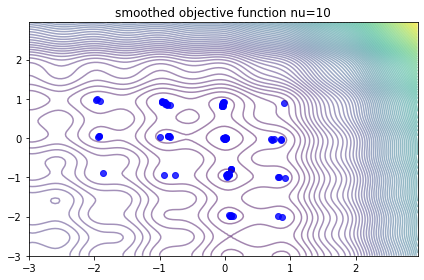

In [140]:
plt.figure(figsize=(6,4))

plt.contour(x,y,val,cmap="viridis",levels=100,alpha=0.5)
plt.scatter([0],[0],color="r")
plt.scatter(xx_set[:,0], xx_set[:,1],color="b",alpha=0.8)
plt.title("smoothed objective function nu=10")

plt.tight_layout()
plt.savefig("pic2.png")

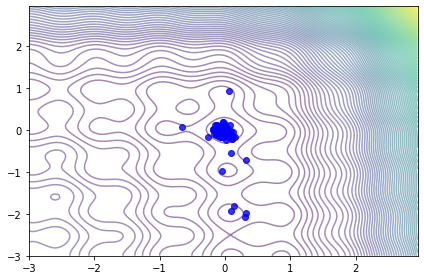

In [146]:
np.random.seed(0)

N_ex = 100
alpha = 5e-3
iter_num = 100
nu = 10
Nr = 10

x0_set = np.zeros([N_ex,2])
x0_set[:,0] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
x0_set[:,1] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
xx_set = np.zeros([N_ex,2])

for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_SGD(grad_fn_R, grad_fn_H, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx

plt.figure(figsize=(6,4))

plt.contour(x,y,val,cmap="viridis",levels=100,alpha=0.5)
plt.scatter([0],[0],color="r")
plt.scatter(xx_set[:,0], xx_set[:,1],color="b",alpha=0.8)

plt.tight_layout()

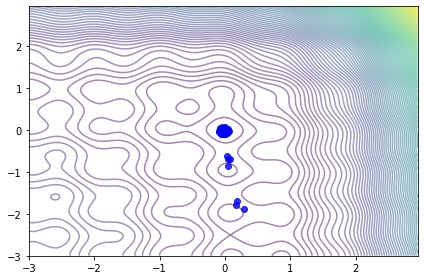

In [149]:
np.random.seed(0)

N_ex = 100
alpha = 5e-3
iter_num = 100
Nr = 50

x0_set = np.zeros([N_ex,2])
x0_set[:,0] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
x0_set[:,1] = np.random.uniform(low=-2.0, high=2.0, size=N_ex)
xx_set = np.zeros([N_ex,2])
xxx_set = np.zeros([N_ex,2])

nu = 10
for i in range(N_ex):
    x0 = x0_set[i]
    xx, x_trace = ML_SGD(grad_fn_R, grad_fn_H, x0, alpha, iter_num, nu, Nr)
    xx_set[i] = xx
    
nu = 50
for i in range(N_ex):
    x0 = xx_set[i]
    xx, x_trace = ML_SGD(grad_fn_R, grad_fn_H, x0, alpha, iter_num, nu, Nr)
    xxx_set[i] = xx

plt.figure(figsize=(6,4))

plt.contour(x,y,val,cmap="viridis",levels=100,alpha=0.5)
plt.scatter([0],[0],color="r")
plt.scatter(xx_set[:,0], xx_set[:,1],color="b",alpha=0.8)

plt.tight_layout()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-2.5 , -2.46, -2.42, -2.38, -2.34, -2.3 , -2.26, -2.22, -2.18,
        -2.14, -2.1 , -2.06, -2.02, -1.98, -1.94, -1.9 , -1.86, -1.82,
        -1.78, -1.74, -1.7 , -1.66, -1.62, -1.58, -1.54, -1.5 , -1.46,
        -1.42, -1.38, -1.34, -1.3 , -1.26, -1.22, -1.18, -1.14, -1.1 ,
        -1.06, -1.02, -0.98, -0.94, -0.9 , -0.86, -0.82, -0.78, -0.74,
        -0.7 , -0.66, -0.62, -0.58, -0.54, -0.5 , -0.46, -0.42, -0.38,
        -0.34, -0.3 , -0.26, -0.22, -0.18, -0.14, -0.1 , -0.06, -0.02,
         0.02,  0.06,  0.1 ,  0.14,  0.18,  0.22,  0.26,  0.3 ,  0.34,
         0.38,  0.42,  0.46,  0.5 ,  0.54,  0.58,  0.62,  0.66,  0.7 ,
         0.74,  0.78,  0.82,  0.86,  0.9 ,  0.94,  0.98,  1.02,  1.06,
         1.1 ,  1.14,  1.18,  1.22,  1.26

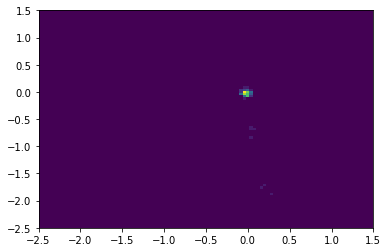

In [158]:
plt.hist2d(xx_set[:,0], xx_set[:,1], bins=[100,100], range=[[-2.5,1.5],[-2.5,1.5]])